# Import libraries

In [1]:
import warnings

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

# Import data

In [2]:
# Load data
raw_train_data = pd.read_csv('train.csv')
raw_test_data = pd.read_csv('test.csv')
raw_train_data.shape , raw_test_data.shape

((891, 12), (418, 11))

In [3]:
raw_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 1 - Data Analysis and Data Preprocessing

# 1.1 - Exploring the descriptive statistics of the variables

In [5]:
test1 = raw_test_data.copy()
test1['Survived'] = np.nan

# then concat them using pandas method
All_data = pd.concat([raw_train_data, raw_test_data]).reset_index(drop = True)
All_data.shape

(1309, 12)

In [6]:
All_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(All_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
All_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
All_data.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [10]:
All_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
All_data[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
All_data[['Sex','Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
All_data[['SibSp','Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
All_data[['Parch', 'Sex', 'Survived']].groupby(['Parch', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Sex,Survived
0,0,female,0.788660
2,1,female,0.766667
6,3,female,0.750000
4,2,female,0.612245
3,1,male,0.327586
5,2,male,0.322581
10,5,female,0.250000
1,0,male,0.165289
7,3,male,0.000000
8,4,female,0.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

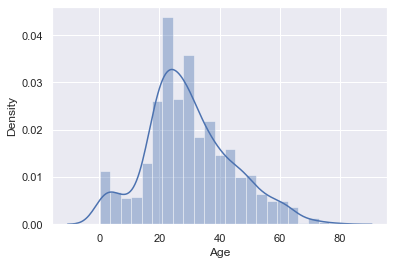

In [15]:
sns.distplot(All_data['Age'])

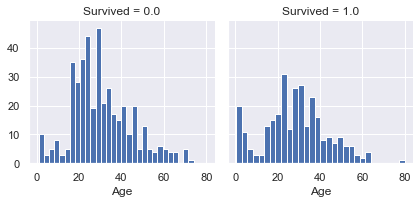

In [16]:
p = sns.FacetGrid(All_data, col='Survived')
p.map(plt.hist, "Age", bins=30)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

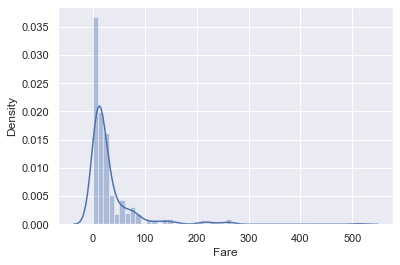

In [17]:
sns.distplot(All_data['Fare'])

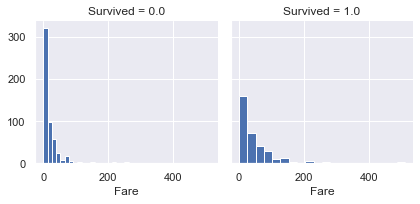

In [18]:
p = sns.FacetGrid(All_data, col='Survived')
p.map(plt.hist, "Fare", bins=20)

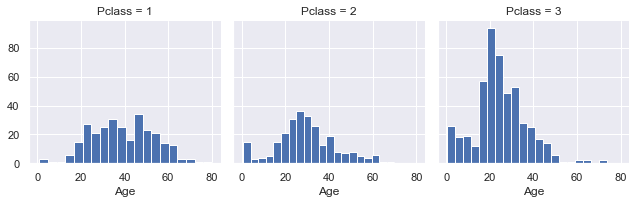

In [19]:
p = sns.FacetGrid(All_data, col="Pclass")
p.map(plt.hist, "Age", bins=20)

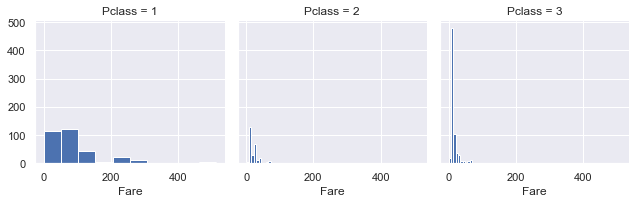

In [20]:
p = sns.FacetGrid(All_data, col="Pclass")
p.map(plt.hist, "Fare", bins=10)

# 1.2 - Wrangle data

In [21]:
All_data['Title'] = All_data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
All_data['Title'] = All_data['Title'].replace('Mlle', 'Miss')
All_data['Title'] = All_data['Title'].replace('Ms', 'Miss')
All_data['Title'] = All_data['Title'].replace('Mme', 'Mrs')

All_data['LastName'] = All_data.Name.str.split(",").str[0]
All_data['FamilySize'] = All_data['SibSp'] + All_data['Parch'] + 1
All_data['IsAlone'] = 0
All_data.loc[All_data['FamilySize'] == 1, 'IsAlone'] = 1

In [22]:
All_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,IsAlone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,1


In [23]:
All_data = All_data.drop(['PassengerId', 'Name', 'SibSp', 'Parch'], axis=1)

In [24]:
All_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,IsAlone
0,0.0,3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,0
1,1.0,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,0
2,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,1
3,1.0,1,female,35.0,113803,53.1000,C123,S,Mrs,Futrelle,2,0
4,0.0,3,male,35.0,373450,8.0500,NaN,S,Mr,Allen,1,1


In [25]:
# g = sns.FacetGrid(All_data, col='Pclass', row='Title', size=2.2, aspect=1.6)
# g.map(plt.hist, 'Age', alpha=.5, bins=20)
# g.add_legend();

In [26]:
# Fill age
All_data['Age'] = All_data.groupby(['Sex', 'Pclass', 'Title'])["Age"].apply(lambda x: x.fillna(x.median()))

In [27]:
# Fill Cabin
All_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
All_data[All_data['Cabin'] == 'F2']

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,IsAlone
148,0.0,2,male,36.5,230080,26.0,F2,S,Mr,Navratil,3,0
193,1.0,2,male,3.0,230080,26.0,F2,S,Master,Navratil,3,0
340,1.0,2,male,2.0,230080,26.0,F2,S,Master,Navratil,3,0
1213,NaN,2,male,26.0,244368,13.0,F2,S,Mr,Nesson,1,1


In [29]:
All_data[All_data['Cabin'] == 'C23 C25 C27']

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,IsAlone
27,0.0,1,male,19.0,19950,263.0,C23 C25 C27,S,Mr,Fortune,6,0
88,1.0,1,female,23.0,19950,263.0,C23 C25 C27,S,Miss,Fortune,6,0
341,1.0,1,female,24.0,19950,263.0,C23 C25 C27,S,Miss,Fortune,6,0
438,0.0,1,male,64.0,19950,263.0,C23 C25 C27,S,Mr,Fortune,6,0
944,NaN,1,female,28.0,19950,263.0,C23 C25 C27,S,Miss,Fortune,6,0
960,NaN,1,female,60.0,19950,263.0,C23 C25 C27,S,Mrs,Fortune,6,0


In [30]:
All_data[All_data['Cabin'] == 'C85']

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,IsAlone
1,1.0,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,0
1125,NaN,1,male,39.0,PC 17599,71.2833,C85,C,Mr,Cumings,2,0


In [31]:
# All_data['Ticket'].unique()

In [32]:
ticket_uniques = All_data['Ticket'].unique()

In [33]:
for i in ticket_uniques:
    try:
        mode = All_data[All_data["Ticket"] == i]["Cabin"].mode()[0]
        All_data[All_data["Ticket"] == i] = All_data[All_data["Ticket"] == i].assign(Cabin=mode)
    except:
        pass

In [34]:
# All_data['LastName'].unique()

In [35]:
lastname_uniques = All_data['LastName'].unique()

In [36]:
for i in lastname_uniques:
    try:
        mode = All_data[All_data["LastName"] == i]["Cabin"].mode()[0]
        All_data[All_data["LastName"] == i] = All_data[All_data["LastName"] == i].assign(Cabin=mode)
    except:
        pass

In [37]:
# All_data['Fare'].unique()

In [38]:
Fare_uniques = All_data['Fare'].unique()

In [39]:
for i in Fare_uniques:
    try:
        mode = All_data[All_data["Fare"] == i]["Cabin"].mode()[0]
        All_data[All_data["Fare"] == i] = All_data[All_data["Fare"] == i].assign(Cabin=mode)
    except:
        pass

In [40]:
# Now we need to make another approach to fill the rest of cabin
# First we extract another feature called cabin_letter

In [41]:
All_data['Cabin_letter'] = All_data['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else np.nan)

In [42]:
# All_data.head()

In [43]:
pd.crosstab(All_data['Pclass'], All_data['Cabin_letter'])

Cabin_letter,A,B,C,D,E,F,G
Pclass,,,,,,,
1,55,89,92,36,26,8,0
2,4,65,4,11,5,84,0
3,0,107,55,26,16,33,5


In [44]:
pd.crosstab(All_data['Embarked'], All_data['Cabin_letter'])

Cabin_letter,A,B,C,D,E,F,G
Embarked,,,,,,,
C,29,33,45,21,11,28,0
Q,0,0,53,1,16,0,0
S,30,226,53,51,20,97,5


In [45]:
pd.crosstab(All_data['Cabin_letter'], [All_data['Pclass'], All_data['Embarked']])

Pclass         1         2          3         
Embarked       C  Q   S  C  Q   S   C   Q    S
Cabin_letter                                  
A             27  0  28  2  0   2   0   0    0
B             33  0  54  0  0  65   0   0  107
C             45  3  44  0  0   4   0  50    5
D             14  0  22  7  0   4   0   1   25
E             11  0  15  0  5   0   0  11    5
F              1  0   7  0  0  84  27   0    6
G              0  0   0  0  0   0   0   0    5

In [46]:
# As you see there is very strong relation between Pclass, Embarked, Cabin_letter
# so i will use them to predict the last amount of cabin_letter
# but first we have (2) missing Embarked need t0 be filled

In [47]:
index_NaN_Embarked = list(All_data["Embarked"][All_data["Embarked"].isnull()].index)
index_NaN_Embarked

[61, 829]

In [48]:
All_data[(All_data.index == 61) | (All_data.index == 829)]

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,IsAlone,Cabin_letter
61,1.0,1,female,38.0,113572,80.0,B28,NaN,Miss,Icard,1,1,B
829,1.0,1,female,62.0,113572,80.0,B28,NaN,Mrs,Stone,1,1,B


In [49]:
All_data[(All_data["FamilySize"]==1) & (All_data["Sex"]=='female') & (All_data["Pclass"]==1)]['Embarked'].mode()[0]

'C'

In [50]:
All_data.loc[61,'Embarked']= "C"
All_data.loc[829,'Embarked']= "C"

In [51]:
# now we can fill the rest of cabin_letter
All_data['Cabin_letter'] = All_data.groupby(['Pclass', 'Embarked'])\
                                                        ["Cabin_letter"].apply(lambda x: x.fillna(x.mode()[0]))

In [52]:
# Fill 1 far missing value
index_NaN_Fare = list(All_data["Fare"][All_data["Fare"].isnull()].index)
index_NaN_Fare

[1043]

In [53]:
All_data[All_data.index == 1043]

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,IsAlone,Cabin_letter
1043,NaN,3,male,60.5,3701,NaN,NaN,S,Mr,Storey,1,1,B


In [54]:
All_data[(All_data["Pclass"] == 3) & (All_data["Title"] == 'Mr') &\
         (All_data["Embarked"] == 'S') & (All_data["Cabin_letter"] == 'B')]['Fare'].mean()

12.165822442244226

In [55]:
All_data.loc[1043,'Fare']= 12.16

In [56]:
All_data.isnull().sum()

Survived        418
Pclass            0
Sex               0
Age               0
Ticket            0
Fare              0
Cabin           588
Embarked          0
Title             0
LastName          0
FamilySize        0
IsAlone           0
Cabin_letter      0
dtype: int64

In [57]:
# Now let's drop the feature we will no longer need
All_data = All_data.drop(['Ticket', 'Cabin'], axis=1)

In [58]:
All_data.isnull().sum()

Survived        418
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
Title             0
LastName          0
FamilySize        0
IsAlone           0
Cabin_letter      0
dtype: int64

In [59]:
All_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,LastName,FamilySize,IsAlone,Cabin_letter
0,0.0,3,male,22.0,7.2500,S,Mr,Braund,2,0,D
1,1.0,1,female,38.0,71.2833,C,Mrs,Cumings,2,0,C
2,1.0,3,female,26.0,7.9250,S,Miss,Heikkinen,1,1,B
3,1.0,1,female,35.0,53.1000,S,Mrs,Futrelle,2,0,C
4,0.0,3,male,35.0,8.0500,S,Mr,Allen,1,1,B


In [60]:
# Now we can start make a new analysis based on completed data

In [61]:
All_data[['Cabin_letter','Survived']].groupby('Cabin_letter', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin_letter,Survived
4,E,0.774194
3,D,0.553846
0,A,0.547619
6,G,0.500000
5,F,0.447514
2,C,0.444444
1,B,0.267898


In [62]:
pd.crosstab(All_data['Cabin_letter'] , All_data['Sex'])

Sex,female,male
Cabin_letter,,
A,16,43
B,173,437
C,107,105
D,36,56
E,27,22
F,102,180
G,5,0


<AxesSubplot:xlabel='Age', ylabel='Density'>

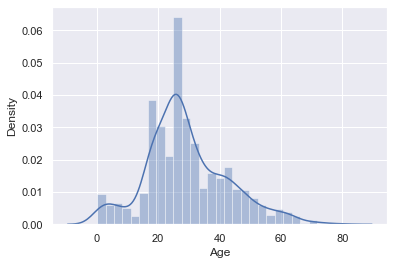

In [63]:
sns.distplot(All_data['Age'])

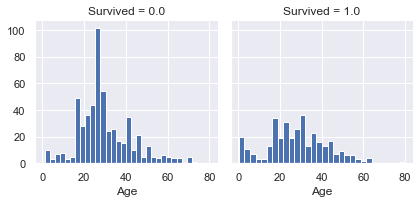

In [64]:
p = sns.FacetGrid(All_data, col='Survived')
p.map(plt.hist, "Age", bins=30)

In [65]:
All_data[['IsAlone','Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [66]:
Mydic = All_data[['FamilySize', 'Title', 'Survived']]\
                        .groupby(['Title', 'FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
Mydic

,Title,FamilySize,Survived
50,Sir,2,1.000000
9,Lady,2,1.000000
14,Master,4,1.000000
12,Master,2,1.000000
13,Master,3,1.000000
3,Countess,1,1.000000
38,Mrs,1,0.904762
41,Mrs,4,0.888889
39,Mrs,2,0.847458
22,Miss,3,0.818182


In [67]:
All_data["SurvivalRate"] = np.nan

In [68]:
All_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,LastName,FamilySize,IsAlone,Cabin_letter,SurvivalRate
0,0.0,3,male,22.0,7.2500,S,Mr,Braund,2,0,D,NaN
1,1.0,1,female,38.0,71.2833,C,Mrs,Cumings,2,0,C,NaN
2,1.0,3,female,26.0,7.9250,S,Miss,Heikkinen,1,1,B,NaN
3,1.0,1,female,35.0,53.1000,S,Mrs,Futrelle,2,0,C,NaN
4,0.0,3,male,35.0,8.0500,S,Mr,Allen,1,1,B,NaN


In [69]:
for i in range(len(All_data)):
    ti = All_data.iat[i,6]
    fm = All_data.iat[i,8]
    xx = Mydic.loc[(Mydic['Title'] == ti) & (Mydic['FamilySize'] == fm)]
    
    yy = xx.iat[0, 2]
    All_data.loc[i,"SurvivalRate"]  = yy

In [70]:
All_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,LastName,FamilySize,IsAlone,Cabin_letter,SurvivalRate
0,0.0,3,male,22.0,7.2500,S,Mr,Braund,2,0,D,0.205882
1,1.0,1,female,38.0,71.2833,C,Mrs,Cumings,2,0,C,0.847458
2,1.0,3,female,26.0,7.9250,S,Miss,Heikkinen,1,1,B,0.757282
3,1.0,1,female,35.0,53.1000,S,Mrs,Futrelle,2,0,C,0.847458
4,0.0,3,male,35.0,8.0500,S,Mr,Allen,1,1,B,0.153652


In [71]:
All_data.isnull().sum()

Survived        418
Pclass            0
Sex               0
Age               0
Fare              0
Embarked          0
Title             0
LastName          0
FamilySize        0
IsAlone           0
Cabin_letter      0
SurvivalRate      5
dtype: int64

In [72]:
All_data['SurvivalRate'] = All_data['SurvivalRate'].fillna(0)

In [73]:
All_data = All_data.drop(['Title', 'LastName', 'FamilySize', 'IsAlone', 'Sex', 'Age', 'Fare'], axis=1)

### 1.3 - Feature Standardization and Encoding

In [74]:
All_data.head()

,Survived,Pclass,Embarked,Cabin_letter,SurvivalRate
0,0.0,3,S,D,0.205882
1,1.0,1,C,C,0.847458
2,1.0,3,S,B,0.757282
3,1.0,1,S,C,0.847458
4,0.0,3,S,B,0.153652


In [75]:
Pcdf = All_data[['Pclass','Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)
Pcdf

NameError: name 'df' is not defined

In [76]:
Emdf = All_data[['Embarked','Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)
Emdf

,Embarked,Survived
0,C,0.558824
1,Q,0.389610
2,S,0.336957


In [77]:
Cabdf = All_data[['Cabin_letter','Survived']].groupby('Cabin_letter', as_index=False)\
                                        .mean().sort_values(by='Survived', ascending=False)
Cabdf

,Cabin_letter,Survived
4,E,0.774194
3,D,0.553846
0,A,0.547619
6,G,0.500000
5,F,0.447514
2,C,0.444444
1,B,0.267898


In [80]:
for i in range(len(All_data)):
    Pc = All_data.iat[i,1]
    Em = All_data.iat[i,2]
    Ca = All_data.iat[i,3]   
    
    Pc1 = Pcdf.loc[(Pcdf['Pclass'] == Pc)]
    Pc1 = Pc1.iat[0, 1]
    
    Em1 = Emdf.loc[(Emdf['Embarked'] == Em)]
    Em1 = Em1.iat[0, 1]
    
    Ca1 = Cabdf.loc[(Cabdf['Cabin_letter'] == Ca)]
    Ca1 = Ca1.iat[0, 1]
    
    All_data.loc[i,"Pclass"]  = Pc1
    All_data.loc[i,"Embarked"]  = Em1
    All_data.loc[i,"Cabin_letter"]  = Ca1

In [81]:
All_data.head()

,Survived,Pclass,Embarked,Cabin_letter,SurvivalRate
0,0.0,0.242363,0.336957,0.553846,0.205882
1,1.0,0.629630,0.558824,0.444444,0.847458
2,1.0,0.242363,0.336957,0.267898,0.757282
3,1.0,0.629630,0.336957,0.444444,0.847458
4,0.0,0.242363,0.336957,0.267898,0.153652


In [82]:
# from sklearn.preprocessing import StandardScaler

In [83]:
# scaler = StandardScaler()

In [84]:
# All_data['Fare'] = scaler.fit_transform(All_data['Fare'].values.reshape(-1,1))

In [85]:
# All_data.head()

### 1.4 - Separate the training set and the test set

In [86]:
data_train = All_data[:len(raw_train_data)]
data_test = All_data[len(raw_train_data):]
data_train.shape, data_test.shape

((891, 5), (418, 5))

In [87]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.drop("Survived", axis=1)

X_train.shape, Y_train.shape, X_test.shape

((891, 4), (891,), (418, 4))

In [88]:
from sklearn.feature_selection import f_regression

In [97]:
f_regression(X_train,Y_train)[1].round(3)

array([0., 0., 0., 0.])

# 2 - Building Machine Learning Model

In [104]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [108]:
Lrcv = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, Y_train)
Lrcv.score(X_train, Y_train)

0.8316498316498316

In [109]:
Lr = LogisticRegression(random_state=0).fit(X_train, Y_train)
Lr.score(X_train, Y_train)

0.8316498316498316

In [111]:
Rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, Y_train)
Rf.score(X_train, Y_train)

0.8316498316498316

In [112]:
Gnb = GaussianNB().fit(X_train, Y_train)
Gnb.score(X_train, Y_train)

0.8103254769921436

In [113]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='soft'
)

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train, Y_train)

In [114]:
grid.score(X_train, Y_train)

0.8395061728395061

In [115]:
yhat = grid.predict(X_test)

In [116]:
output = pd.DataFrame({'PassengerId': raw_test_data.PassengerId, 'Survived': yhat})
output.to_csv('submission101.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
